In [1]:
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
%run dataProc.ipynb

print('dataProc.ipynb loaded')

dataProc.ipynb loaded


In [3]:
#The standard deviation for discount is a representation of the 
#distance between the value discounted for each product and 
#the value discounted for the total series. Less than 25% of 
#the data is under the first quarter so the discount column has
#note enough data to be a reliable representation of the discount
#behavior over time.

print(data.describe())

              value       discount
count  5.355250e+05  535525.000000
mean   2.104562e+04      57.790460
std    4.959744e+04    1396.090302
min    0.000000e+00       0.000000
25%    4.000000e+03       0.000000
50%    1.000000e+04       0.000000
75%    2.280000e+04       0.000000
max    7.600000e+06  378000.000000


In [5]:
fig = make_subplots(specs=[[{"secondary_y": True}]])


fig.add_trace(go.Scatter(
    x=bagsSupply['yearMonth'],
    y=bagsSupply['value'],
    name="Bags supply"
    ),
secondary_y=False)

fig.add_trace(go.Scatter(
    x=productSeries['yearMonth'],
    y=productSeries['value'],
    name="Top 28"
    ),
secondary_y=True)

fig.add_trace(go.Scatter(
    x=dateValue['yearMonth'], 
    y=dateValue['value'],
    name="Value AGG"
    ),
secondary_y=True)



fig.update_layout(
    title_text="Top 28 products <b>vs.</b> Total value <b>vs.</b> BAGS - value aggregated per month\nJan 2020 - Oct 2021",
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="RebeccaPurple"
    )
)

fig.update_xaxes(title_text="DATE")

fig.update_yaxes(title_text="BAGS/MONTH [UND]", secondary_y=False)
fig.update_yaxes(title_text="VALUE AGG [M]", secondary_y=True)

fig.show()

#Seems that there is certain seasonality over June - July for both years. 
#This behavior could be explained for some products or for some volume
#differences between months.
#Top discount product for reference.

In [6]:
print('TOTAL BAGS USED :\t', int(bags))

print('\n\nTop discount product: ', outlyer)

#In addition to the seasonality of the value, there is two moments
#in series that are interesting since the efficiency of the # BAGS 
#used is different in behavior than the value.

TOTAL BAGS USED :	 126718


Top discount product:  itemName                                 
ESCORPION HERBICIDA SL X 205 LTRS  437265    378000.0
Name: discount, dtype: float64


In [7]:
print('Count of null in customerID :\t', null, '\nTotal registries :\t\t', total, 
      '\nPercentage of null registries :\t', per, '%')

#The customerID field is mostly populated for all registries.
#The entries without it does not aggregate value to the total.

Count of null in customerID :	 4309 
Total registries :		 538421 
Percentage of null registries :	 0.8 %


In [8]:
fig = px.bar(x=paymentMet['paymentMethod'], y=paymentMet['value'], log_y=True)

fig.update_layout(
    title        = "Total value aggregated by paymentMethod Jan 2020 - Oct 2021",
    xaxis_title  = "PAYMENT METHOD",
    yaxis_title  = "VALUE AGG [M] - LOG SCALE",
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="RebeccaPurple"
    )
)

fig.show()

print(paymentMet)
print('\n\nTotal value aggregated all series: ', round(grandTotal, 2), 'M')\

#The majority of the operations are conducted with CON (wich I assume is cash)
#There is not enough data from CO1, CO2, CO3 or MPE to compare within the time.
#Logaritmic scale is added for visualization since the difference is huge.

  paymentMethod         value  percentage
0           C01      0.003361     0.00003
1           C02      0.044800     0.00040
2           C03      0.184252     0.00163
3           CON  11269.826206    99.99555
4           MPE      0.269266     0.00239


Total value aggregated all series:  11270.33 M


In [10]:
topProducts

#Query the data to get the top 5 products by month
#will be useful to see the aggregated contribution of each
#in the BAGS consumption and in the value aggregation.

,yearMonth,itemName,value
0,2020-01,MELAZA BULTO X 30 KLS,11.006063
1,2020-01,Q-IDA CAN 19 ADULTO BULTO X 30 KL,8.072090
2,2020-01,FORTIN 200 X 40 KLS,5.817778
3,2020-01,KYRO-RAT SBE X 50 GRMS,5.734800
4,2020-01,BRAVECTO LARGE (20-40kg) CJA X 1 TAB,5.689200
...,...,...,...
105,2021-10,TRONADOR X 20 LTS,0.512000
106,2021-10,PRO PLAN CAT URINARY X 3K,0.109619
107,2021-10,PRO PLAN SB EXIGENT X 3 KG,0.100381
108,2021-10,NEXGARD XL (25.1-50 KG) CAJA X 1 TAB,0.087200


In [12]:
fig = px.bar(x=countTop['itemName'], y=countTop['count'], log_y=True)


fig.update_layout(
    title        = "Top 28 products frequency of appereance in monthly top 5 Jan 2020 - Oct 2021",
    xaxis_title  = "ITEM",
    yaxis_title  = "FREQUENCY",
    font=dict(
        family="Courier New, monospace",
        size=9,
        color="RebeccaPurple"
    )
)

fig.update_xaxes(tickangle=90)
fig.show()

#From the Top 5 list I get the list of all products that appear at least
#in once month.This produce a portion of the value that seems to be
#related with the seasonality but not with the BAGS consumption gap.

#The ratio between both value plots is stable.
#Q-IDA CAN 19 ADULTO BULTO X 30KL is the best seller of the store 
#appearing 19 out of 21 times in the monthly top 5. Frequency is a count
#of appeareances in top 5 list.

In [13]:
fig = px.bar(x=topGroup['itemGroup'], y=topGroup['value'], log_y=True)


fig.update_layout(
    title        = "Top group contributions to value Jan 2020 - Oct 2021",
    xaxis_title  = "GROUP",
    yaxis_title  = "VALUE AGG [M]",
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="RebeccaPurple"
    )
)

fig.show()

#Grouped products by category.
#Pharma and agrochemical products are tied in second place
#each of these categories double the next two in value aggregated.

In [17]:
fig = px.bar(x=topGroupBrand['brand'], y=topGroupBrand['value'], log_y=True)


fig.update_layout(
    title        = "Top brand contributions to value Jan 2020 - Oct 2021",
    xaxis_title  = "BRAND",
    yaxis_title  = "VALUE AGG [M]",
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="RebeccaPurple"
    )
)

fig.update_xaxes(tickangle=90)
fig.show()

#As expected, the two most valuable brands are from the two
#most valuable categories.

In [14]:
seriesTopPT = pd.pivot_table(seriesTop, values='value', index=['yearMonth'],columns='itemName', aggfunc=np.sum)

fig = go.Figure()
for col in seriesTopPT.columns:
    fig.add_trace(go.Scatter(
        x=seriesTopPT.index, 
        y=seriesTopPT[col].values,
        name = col))
    
fig.update_layout(
    title        = "Top 28 product series - evaluate seasonality Jan 2020 - Oct 2021",
    xaxis_title  = "DATE",
    yaxis_title  = "VALUE AGG [M]",
    font=dict(
        family="Courier New, monospace",
        size=8,
        color="RebeccaPurple"
    )
)

fig.show()

#Value by top products does not reveal any seasonality or pattern
#but there are several peaks that can be interest points to compare.
#with other data such as ticketNumber and ticketNumberDetail


#Adittionaly with this query we can see the evolution in sells for
#each product in the dataset: - explore further

In [15]:
fig = px.bar(x=topCustomer['customerID'], y=topCustomer['value'], log_y=True)


fig.update_layout(
    title        = "Top contributions to value by customerID Jan 2020 - Oct 2021",
    xaxis_title  = "CUSTOMER ID",
    yaxis_title  = "VALUE AGG [M]",
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="RebeccaPurple"
    )
)

fig.update_xaxes(tickangle=90)
fig.show()

#PDV CustomerID is far beyond the best customer
#Since I assume this PDV code is for some kind of special customer
#and does not represent a real client could be useful to add
#granularity to the measure grouping by other categories if there is
#any relevant question to answer on this transactions. 

#Logaritmic scale added once more.

In [16]:
seriesCustomerPT = pd.pivot_table(seriesCustomer, values='value', index=['yearMonth'],columns='customerID', aggfunc=np.sum)
pdvSeriesPT = pd.pivot_table(pdvSeries, values='value', index=['yearMonth'],columns='customerID', aggfunc=np.sum)


fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])

for col in seriesCustomerPT.columns:
    fig.add_trace(go.Scatter(
        x=seriesCustomerPT.index, 
        y=seriesCustomerPT[col].values,
        name = col),
    secondary_y=False)

fig.add_trace(go.Scatter(
    x=pdvSeriesPT.index, 
    y=pdvSeriesPT['PDV'].values,
    name="PDV",
    mode='lines+markers'),
secondary_y=True)
    
fig.update_layout(
    title        = "Top 10 cutomers series - evaluate behavior over time Jan 2020 - Oct 2021",
    xaxis_title  = "DATE",
    yaxis_title  = "VALUE AGG [M]",
    font=dict(
        family="Courier New, monospace",
        size=8,
        color="RebeccaPurple"
    )
)


fig.show()

#PDV customerID explain the peak in value added for Jul 2021
#Is representing the exact same behavior than the total value
#so it is feasible to think that is the most important talking
#point.

#Other customers (retail customer I assume) can not to be considered
#as big contributors to the tendencies but all of them could be 
#traced with ticketNumber to see the most valuable products for this
#stakeholders group.

In [205]:
fig = px.bar(x=topVendor['createdBy'], y=topVendor['value'], log_y=True)


fig.update_layout(
    title        = "Top contributions to value by sales representatives Jan 2020 - Oct 2021",
    xaxis_title  = "NAME",
    yaxis_title  = "VALUE AGG [M]",
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="RebeccaPurple"
    )
)

fig.update_xaxes(tickangle=90)
fig.show()

In [18]:
seriesVendorPT = pd.pivot_table(seriesVendor, values='value', index=['yearMonth'],columns='createdBy', aggfunc=np.sum)

fig = go.Figure()
for col in seriesVendorPT.columns:
    fig.add_trace(go.Scatter(
        x=seriesVendorPT.index, 
        y=seriesVendorPT[col].values,
        name = col,
        mode='lines+markers'))
    
fig.update_layout(
    title        = "Top 10 sales representative series Jan 2020 - Oct 2021",
    xaxis_title  = "DATE",
    yaxis_title  = "VALUE AGG [M]",
    font=dict(
        family="Courier New, monospace",
        size=8,
        color="RebeccaPurple"
    )
)

fig.show()

#Some of the representatives has no data for the entire serie
#Should explore further a comparisson with those who have populated
#the entire series in order to see the mean value/month/representative
#compared with top 10.

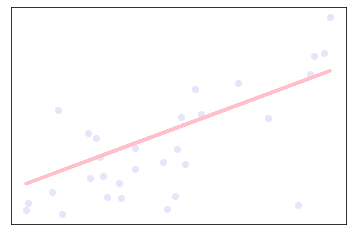

Exception: File `'plotly.ipynb.py'` not found.

Exception: File `'plotly.ipynb.py'` not found.

In [19]:
%run ml.ipynb

print('ml.ipynb loaded')